## 📘 M1.4 NumPy Broadcasting 原理與實務應用

本教學將詳細介紹 NumPy 中的 Broadcasting（廣播）機制，這是 NumPy 中一個強大的功能，
允許對不同形狀的陣列進行算術運算，大幅簡化程式碼並提高計算效率。

### 🎯 教學目標

- 🔍 了解 Broadcasting 的基本原理與規則
- 🛠️ 掌握 Broadcasting 在實際應用中的使用方法
- ⚠️ 學會如何避免 Broadcasting 相關的常見錯誤
- 🚀 理解 Broadcasting 對效能的影響

### 🧰 1. 環境設置與導入必要的套件

**學習要點**：
- 導入 NumPy、Matplotlib 和時間測量模組
- 設定 NumPy 顯示選項以提高輸出可讀性

**應用場域**：
- 數據科學與分析的前置準備
- 科學計算中的環境配置

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

# 設定顯示選項，使輸出更易讀
np.set_printoptions(precision=3, suppress=True)

**解說**：
- `np.set_printoptions(precision=3)` 讓浮點數顯示保留3位小數
- `suppress=True` 抑制科學記號顯示，使大小數字更易讀
- 匯入 matplotlib 用於視覺化，time 用於效能測量

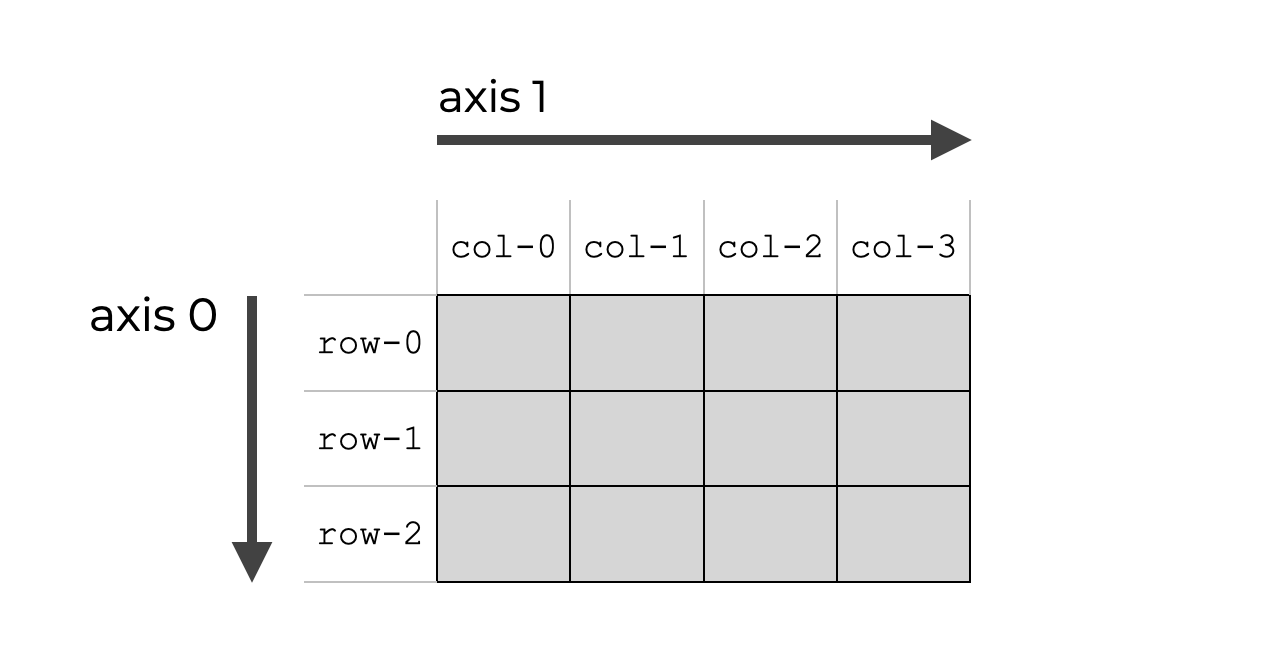

### 📡 2. 什麼是 Broadcasting？

**學習要點**：
- 理解 Broadcasting 的基本概念
- 掌握標量與陣列間的自動擴展機制
- 體會 Broadcasting 帶來的代碼簡化

**應用場域**：
- 資料標準化與歸一化處理
- 矩陣運算優化
- 向量化運算增強

Broadcasting 是 NumPy 中的一個機制，允許對形狀不同的陣列進行算術運算。它的核心思想是將較小的陣列「廣播」到較大的陣列的形狀，而不需要實際複製數據，從而實現高效的向量化運算。

In [11]:
# 基本範例：標量與陣列運算
arr = np.array([1, 2, 3, 4, 5])
scalar = 5

# 標量自動廣播到陣列的每個元素
result = arr + scalar
print(f"陣列: {arr}")
print(f"標量: {scalar}")
print(f"結果 (arr + scalar): {result}")

陣列: [1 2 3 4 5]
標量: 5
結果 (arr + scalar): [ 6  7  8  9 10]


**解說**：
- Broadcasting 允許不同形狀的陣列進行運算，內部自動擴展較小的陣列
- 最簡單的例子是標量與陣列運算，標量被「看作」與陣列相同形狀
- 這種機制不會實際產生大量臨時陣列，而是在運算過程中虛擬擴展

### 📏 3. Broadcasting 的基本規則

**學習要點**：
- 掌握 NumPy Broadcasting 的三條基本規則
- 理解不同形狀陣列間的兼容性條件
- 學會診斷與理解 Broadcasting 錯誤

**應用場域**：
- 多維數據處理中的矩陣運算
- 特徵工程中的向量變換
- 高維統計分析中的數組操作

NumPy 比較兩個陣列的形狀，從最右側的維度開始比較：

1. 如果兩個陣列在某一維度上的長度相同，則可在該維度上進行運算。
2. 如果兩個陣列在某一維度上的長度不同，但其中一個為 1，則這個維度會被拉伸為另一個陣列的該維度長度。
3. 如果兩個陣列在任何一個維度上長度不匹配，且沒有一個長度為 1，則無法進行廣播。

In [12]:
# 展示 Broadcasting 規則
print("Broadcasting 規則示例:")

# 1. 兩個陣列具有相同的形狀
arr1 = np.array([1, 2, 3])
arr2 = np.array([10, 20, 30])
print(f"\n形狀相同的陣列相加:")
print(f"arr1 (形狀 {arr1.shape}): {arr1}")
print(f"arr2 (形狀 {arr2.shape}): {arr2}")
print(f"arr1 + arr2 = {arr1 + arr2}")

# 2. 一個形狀為 (n, m) 的陣列與一個形狀為 (1, m) 的陣列運算
arr3 = np.array([[1, 2, 3], [4, 5, 6]])  # 形狀 (2, 3)
arr4 = np.array([[10, 20, 30]])          # 形狀 (1, 3)
print(f"\n行向量廣播到矩陣:")
print(f"arr3 (形狀 {arr3.shape}):\n{arr3}")
print(f"arr4 (形狀 {arr4.shape}):\n{arr4}")
print(f"arr3 + arr4 =\n{arr3 + arr4}")  # arr4 的第一維被廣播

# 3. 一個形狀為 (n, m) 的陣列與一個形狀為 (n, 1) 的陣列運算
arr5 = np.array([[100], [200]])  # 形狀 (2, 1)
print(f"\n列向量廣播到矩陣:")
print(f"arr3 (形狀 {arr3.shape}):\n{arr3}")
print(f"arr5 (形狀 {arr5.shape}):\n{arr5}")
print(f"arr3 + arr5 =\n{arr3 + arr5}")  # arr5 的第二維被廣播

# 4. 運算無法廣播的情況
arr6 = np.array([1, 2])  # 形狀 (2,)
arr7 = np.array([1, 2, 3])  # 形狀 (3,)
print(f"\n無法廣播的陣列:")
print(f"arr6 (形狀 {arr6.shape}): {arr6}")
print(f"arr7 (形狀 {arr7.shape}): {arr7}")
try:
    print(f"arr6 + arr7 = {arr6 + arr7}")
except ValueError as e:
    print(f"錯誤: {e}")

Broadcasting 規則示例:

形狀相同的陣列相加:
arr1 (形狀 (3,)): [1 2 3]
arr2 (形狀 (3,)): [10 20 30]
arr1 + arr2 = [11 22 33]

行向量廣播到矩陣:
arr3 (形狀 (2, 3)):
[[1 2 3]
 [4 5 6]]
arr4 (形狀 (1, 3)):
[[10 20 30]]
arr3 + arr4 =
[[11 22 33]
 [14 25 36]]

列向量廣播到矩陣:
arr3 (形狀 (2, 3)):
[[1 2 3]
 [4 5 6]]
arr5 (形狀 (2, 1)):
[[100]
 [200]]
arr3 + arr5 =
[[101 102 103]
 [204 205 206]]

無法廣播的陣列:
arr6 (形狀 (2,)): [1 2]
arr7 (形狀 (3,)): [1 2 3]
錯誤: operands could not be broadcast together with shapes (2,) (3,) 


**解說**：
- Broadcasting 從最右側維度開始比較，維度必須相等或其中一個為 1
- 二維陣列中，行向量 (1, n) 可與每一列運算，列向量 (n, 1) 可與每一行運算
- 當兩個陣列維度不同時，較小的會被視為增加維度1的版本（左側添加1）
- 當陣列維度完全不兼容時，會引發 ValueError，表示無法廣播

### 🧊 4. 多維陣列的 Broadcasting

**學習要點**：
- 理解高維陣列間的廣播規則
- 掌握不同維度陣列之間的交互作用
- 學習如何預測廣播後的結果形狀

**應用場域**：
- 三維影像處理（如醫學影像、視頻分析）
- 物理模擬中的多維度計算
- 張量運算在深度學習中的應用

In [13]:
# 三維陣列與二維陣列的廣播
arr_3d = np.ones((3, 4, 5))  # 形狀 (3, 4, 5)
arr_2d = np.arange(20).reshape(4, 5)  # 形狀 (4, 5)

# 二維陣列廣播到三維陣列
result_3d_2d = arr_3d + arr_2d
print(f"三維陣列 (形狀 {arr_3d.shape}) 與二維陣列 (形狀 {arr_2d.shape}) 相加")
print(f"結果形狀: {result_3d_2d.shape}")
print(f"結果第一層:\n{result_3d_2d[0]}")

# 一維陣列廣播到三維陣列
arr_1d = np.arange(5)  # 形狀 (5,)
result_3d_1d = arr_3d + arr_1d
print(f"\n三維陣列 (形狀 {arr_3d.shape}) 與一維陣列 (形狀 {arr_1d.shape}) 相加")
print(f"結果形狀: {result_3d_1d.shape}")
print(f"結果第一層第一列:\n{result_3d_1d[0, 0]}")

三維陣列 (形狀 (3, 4, 5)) 與二維陣列 (形狀 (4, 5)) 相加
結果形狀: (3, 4, 5)
結果第一層:
[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]]

三維陣列 (形狀 (3, 4, 5)) 與一維陣列 (形狀 (5,)) 相加
結果形狀: (3, 4, 5)
結果第一層第一列:
[1. 2. 3. 4. 5.]


**解說**：
- 多維廣播遵循同樣的規則，從最右側維度開始匹配
- 二維陣列 (4, 5) 廣播到三維 (3, 4, 5) 時，虛擬添加第一個維度變為 (1, 4, 5)
- 一維陣列 (5,) 廣播到三維 (3, 4, 5)，相當於擴展為 (1, 1, 5)，然後擴展到 (3, 4, 5)
- 廣播操作不會實際創建完整的擴展陣列，而是在計算時按需生成值

## 5. Broadcasting 的實際應用範例

### 📊 5. Broadcasting 的實際應用範例

### 5.1 數據標準化 (減均值除以標準差)

**學習要點**：
- 利用 Broadcasting 實現數據標準化
- 掌握沿特定軸計算統計量的方法
- 理解標準化在數據預處理中的重要性

**應用場域**：
- 機器學習模型的數據預處理
- 異常值檢測中的數據正規化
- 不同量級特徵的比較分析

In [14]:
# 創建一個 3x4 的隨機數據矩陣
data = np.random.randn(3, 4)
print(f"原始數據:\n{data}")

# 計算每列的均值和標準差
mean = data.mean(axis=0)  # 沿列計算均值 (形狀 (4,))
std = data.std(axis=0)    # 沿列計算標準差 (形狀 (4,))

print(f"\n列均值: {mean}")
print(f"列標準差: {std}")

# 標準化數據 (Broadcasting 自動應用)
standardized = (data - mean) / std
print(f"\n標準化後數據:\n{standardized}")

# 驗證標準化後的均值和標準差
print(f"\n標準化後的列均值: {standardized.mean(axis=0)}")
print(f"標準化後的列標準差: {standardized.std(axis=0)}")

原始數據:
[[-0.04   0.166  1.248  1.042]
 [ 0.5    0.934  0.741  0.055]
 [ 0.789  1.789 -0.745 -0.337]]

列均值: [0.417 0.963 0.415 0.253]
列標準差: [0.343 0.663 0.845 0.58 ]

標準化後數據:
[[-1.328 -1.202  0.985  1.359]
 [ 0.243 -0.044  0.386 -0.342]
 [ 1.085  1.246 -1.371 -1.017]]

標準化後的列均值: [ 0. -0. -0. -0.]
標準化後的列標準差: [1. 1. 1. 1.]


**解說**：
- 數據標準化通過減去均值並除以標準差，將數據轉換為均值為0、標準差為1的分布
- `axis=0` 指定沿著列方向計算統計量，結果是形狀為 (4,) 的向量
- Broadcasting 自動將 mean 和 std 向量擴展應用到矩陣的每一列
- 標準化是機器學習中常用的預處理步驟，能消除不同特徵間的尺度差異

### 5.2 距離矩陣計算

**學習要點**：
- 使用 Broadcasting 高效計算點集間的距離矩陣
- 比較循環方法與向量化方法的效率差異
- 學習多維陣列擴展與廣播的組合應用

**應用場域**：
- 聚類分析中的相似度計算
- 推薦系統中的用戶/物品相似度矩陣
- 生物信息學中的序列比對距離

In [25]:
# 計算點集之間的歐氏距離
points = np.random.rand(5, 2)  # 5個二維點
print(f"隨機點集 (5個點, 2個座標):\n{points}")

# 方法1: 使用雙重迴圈 (低效)
n = points.shape[0]
distances_loop = np.zeros((n, n))

start_time = time.time()
for i in range(n):
    for j in range(n):
        # 計算兩點之間的歐氏距離
        dist = np.sqrt(np.sum((points[i] - points[j])**2))
        distances_loop[i, j] = dist
loop_time = time.time() - start_time

print(f"\n使用迴圈計算的距離矩陣:\n{distances_loop}")
print(f"迴圈方法耗時: {loop_time:.6f} 秒")

# 方法2: 使用 Broadcasting (高效)
start_time = time.time()
# 重塑點集以便廣播
# 形狀 (5, 1, 2) - 每一點作為一列
points_expanded_rows = points[:, np.newaxis, :]
# 形狀 (1, 5, 2) - 每一點作為一行
points_expanded_cols = points[np.newaxis, :, :]

# 通過廣播計算每對點的差異
# 形狀 (5, 5, 2) - 每對點的座標差
diff = points_expanded_rows - points_expanded_cols
# 計算歐氏距離
distances_broadcast = np.sqrt(np.sum(diff**2, axis=2))
broadcast_time = time.time() - start_time

print(f"\n使用廣播計算的距離矩陣:\n{distances_broadcast}")
print(f"廣播方法耗時: {broadcast_time:.6f} 秒")


隨機點集 (5個點, 2個座標):
[[0.902 0.463]
 [0.675 0.205]
 [0.258 0.271]
 [0.12  0.632]
 [0.737 0.56 ]]

使用迴圈計算的距離矩陣:
[[0.    0.343 0.672 0.8   0.192]
 [0.343 0.    0.422 0.7   0.36 ]
 [0.672 0.422 0.    0.386 0.559]
 [0.8   0.7   0.386 0.    0.621]
 [0.192 0.36  0.559 0.621 0.   ]]
迴圈方法耗時: 0.000000 秒

使用廣播計算的距離矩陣:
[[0.    0.343 0.672 0.8   0.192]
 [0.343 0.    0.422 0.7   0.36 ]
 [0.672 0.422 0.    0.386 0.559]
 [0.8   0.7   0.386 0.    0.621]
 [0.192 0.36  0.559 0.621 0.   ]]
廣播方法耗時: 0.000000 秒


In [23]:
broadcast_time

0.0

In [17]:
points

array([[0.545, 0.092],
       [0.842, 0.919],
       [0.401, 0.499],
       [0.951, 0.566],
       [0.481, 0.517]])

In [18]:
points[:, np.newaxis, :]

array([[[0.545, 0.092]],

       [[0.842, 0.919]],

       [[0.401, 0.499]],

       [[0.951, 0.566]],

       [[0.481, 0.517]]])

In [19]:
points[np.newaxis, :, :]

array([[[0.545, 0.092],
        [0.842, 0.919],
        [0.401, 0.499],
        [0.951, 0.566],
        [0.481, 0.517]]])

In [20]:
diff

array([[[ 0.   ,  0.   ],
        [-0.297, -0.826],
        [ 0.144, -0.407],
        [-0.406, -0.474],
        [ 0.064, -0.424]],

       [[ 0.297,  0.826],
        [ 0.   ,  0.   ],
        [ 0.441,  0.42 ],
        [-0.109,  0.352],
        [ 0.361,  0.402]],

       [[-0.144,  0.407],
        [-0.441, -0.42 ],
        [ 0.   ,  0.   ],
        [-0.551, -0.067],
        [-0.08 , -0.018]],

       [[ 0.406,  0.474],
        [ 0.109, -0.352],
        [ 0.551,  0.067],
        [ 0.   ,  0.   ],
        [ 0.47 ,  0.05 ]],

       [[-0.064,  0.424],
        [-0.361, -0.402],
        [ 0.08 ,  0.018],
        [-0.47 , -0.05 ],
        [ 0.   ,  0.   ]]])

**解說**：
- 距離矩陣計算是許多機器學習算法的基礎，直接影響效能
- 傳統的雙重循環方法簡單但效率低，特別是點數增加時
- Broadcasting 方法通過將點集重塑為互補形狀 (5,1,2) 和 (1,5,2)，實現自動配對
- 關鍵步驟是理解如何使用 `np.newaxis` 增加維度，使廣播機制能正確配對每兩個點
- 向量化方法通常比循環快數十到數百倍，尤其在大型數據集上

### 5.3 圖像處理：加入水印

**學習要點**：
- 使用 Broadcasting 實現圖像區域處理
- 學習切片與運算結合的數據修改方法
- 掌握不同形狀區域的數值疊加技巧

**應用場域**：
- 圖像處理與水印添加
- 影像分析中的區域處理
- 熱圖與數據視覺化增強

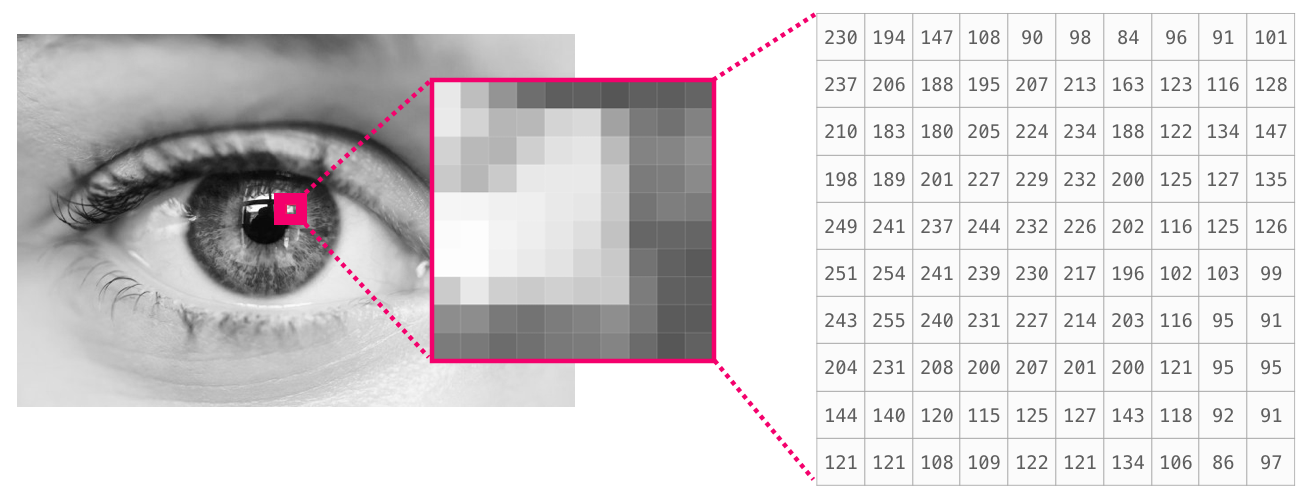

In [26]:
# 創建一個簡單的灰度圖像
image = np.ones((5, 10)) * 0.5  # 5x10 的灰度圖像，初始值為 0.5
print(f"原始圖像:\n{image}")

# 創建一個水印 (例如右下角的小矩形)
watermark = np.ones((2, 3)) * 0.2  # 2x3 的矩形，值為 0.2

# 在圖像的右下角添加水印
# 不需要迴圈，直接用切片和賦值
image[3:5, 7:10] = image[3:5, 7:10] + watermark
print(f"\n添加水印後的圖像:\n{image}")

原始圖像:
[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]]

添加水印後的圖像:
[[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.7 0.7 0.7]
 [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.7 0.7 0.7]]


**解說**：
- 圖像處理中，常需要對特定區域進行操作，切片與 Broadcasting 結合特別有用
- 此例中，通過切片 `image[3:5, 7:10]` 選定右下角 2x3 的區域
- 水印直接加到圖像的切片上，形狀完全匹配，不需額外的廣播
- 在實際應用中，可以用類似方法添加浮水印、標記特定區域或進行區域增強

### 5.4 多項式評估

**學習要點**：
- 使用 Broadcasting 實現多項式函數的向量化評估
- 比較不同方法的效率與可讀性
- 學習如何將數學運算轉換為矩陣運算

**應用場域**：
- 曲線擬合與函數近似
- 信號處理中的多項式濾波
- 物理模型的數值模擬

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 設置中文字型
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設置中文字型為微軟正黑體
plt.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

評估點: [-2. -1.  0.  1.  2.]

使用迴圈評估多項式: [ 9.  2.  1.  6. 17.]
使用廣播評估多項式: [ 9.  2.  1.  6. 17.]
使用 np.polyval 評估多項式: [ 9.  2.  1.  6. 17.]


Text(0, 0.5, 'f(x)')

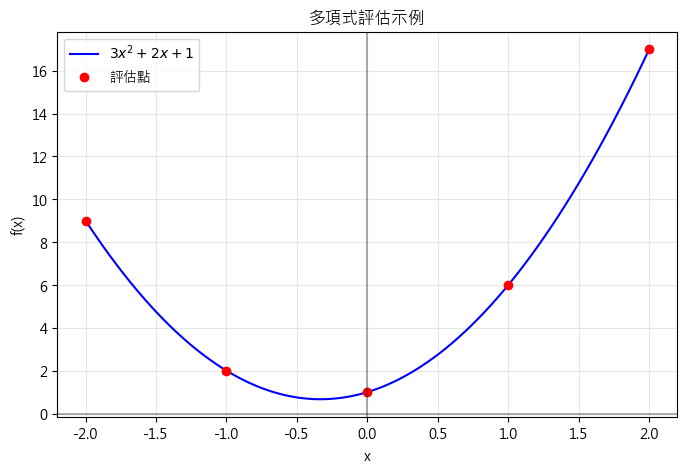

In [29]:
# 評估一個多項式在多個點上的值
# 例如：f(x) = 3x^2 + 2x + 1

# 多項式係數 [1, 2, 3]，表示 3x^2 + 2x + 1
coefficients = np.array([1, 2, 3])

# 評估點
x = np.linspace(-2, 2, 5)  # 在 [-2, 2] 範圍內取 5 個點
print(f"評估點: {x}")

# 方法1: 使用迴圈
result_loop = np.zeros_like(x)
for i, xi in enumerate(x):
    # 計算多項式值
    result_loop[i] = coefficients[0] + coefficients[1] * xi + coefficients[2] * xi**2

print(f"\n使用迴圈評估多項式: {result_loop}")

# 方法2: 使用 Broadcasting (向量化)
# 創建冪次矩陣：每行是一個點，每列是一個冪次
powers = np.vstack([x**i for i in range(len(coefficients))])
# 用係數做點積
result_broadcast = coefficients @ powers
print(f"使用廣播評估多項式: {result_broadcast}")

# 方法3: 使用 NumPy 的 polyval 函數
result_polyval = np.polyval(coefficients[::-1], x)
print(f"使用 np.polyval 評估多項式: {result_polyval}")

# 繪製多項式圖形
plt.figure(figsize=(8, 5))
x_dense = np.linspace(-2, 2, 100)
y_dense = np.polyval(coefficients[::-1], x_dense)
plt.plot(x_dense, y_dense, 'b-', label='$3x^2 + 2x + 1$')
plt.plot(x, result_broadcast, 'ro', label='評估點')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('多項式評估示例')
plt.xlabel('x')
plt.ylabel('f(x)')

**解說**：
- 多項式評估是科學計算中的基本操作，可用於函數近似和數值分析
- 循環方法直觀但低效，特別是當評估點數量和多項式階數增加時
- 向量化方法創建冪次矩陣，每行代表一個冪次 (x⁰, x¹, x²...)，然後與係數向量做點積
- `np.polyval` 是最簡潔的方法，但了解如何用 Broadcasting 實現有助於理解底層運算
- 這種技術可推廣到更複雜的函數評估，如傅立葉級數、泰勒展開等

### 💾 6. Broadcasting 與記憶體效率

**學習要點**：
- 理解 Broadcasting 對記憶體使用的影響
- 比較顯式創建大陣列與隱式廣播的效率差異
- 掌握如何選擇最佳的陣列操作方法

**應用場域**：
- 大規模數據處理的優化
- 記憶體受限環境中的計算
- 高效能科學計算與模擬

In [31]:
# 比較 Broadcasting 與顯式創建大型陣列的記憶體使用
size = 1000
large_array = np.random.rand(size, size)
print(f"大型陣列形狀: {large_array.shape}")

# 方法1: 顯式創建同大小的陣列後相加 (浪費記憶體)
scalar = 5
start_time = time.time()
# 創建與 large_array 相同形狀的全 scalar 陣列
scalar_array = np.full_like(large_array, scalar)
# 相加
result1 = large_array + scalar_array
method1_time = time.time() - start_time
print(f"方法1 (顯式陣列) 耗時: {method1_time:.6f} 秒")

# 方法2: 使用 Broadcasting (高效)
start_time = time.time()
result2 = large_array + scalar
method2_time = time.time() - start_time
print(f"方法2 (Broadcasting) 耗時: {method2_time:.6f} 秒")
# print(f"方法1/方法2 耗時比: {method1_time/method2_time:.2f}x")

# 驗證結果相同
print(f"兩種方法結果是否相同: {np.allclose(result1, result2)}")

大型陣列形狀: (1000, 1000)
方法1 (顯式陣列) 耗時: 0.008003 秒
方法2 (Broadcasting) 耗時: 0.003950 秒
兩種方法結果是否相同: True


**解說**：
- Broadcasting 不僅代碼簡潔，還能大幅降低記憶體使用
- 顯式創建完整陣列 (`np.full_like`) 需要額外分配與原陣列相同大小的記憶體
- 而 Broadcasting (`large_array + scalar`) 在內部優化時不需要創建完整的臨時陣列
- 這種效率差異在大規模計算中尤為明顯，可能導致數倍的性能差距
- 對於大型數據分析，優先考慮使用 Broadcasting 機制而非顯式擴展

### ⚠️ 7. Broadcasting 的常見錯誤與解決方案

**學習要點**：
- 識別常見的 Broadcasting 錯誤類型
- 學習診斷與修復形狀不兼容問題
- 掌握陣列重塑以匹配廣播需求的技巧

**應用場域**：
- 多維數據處理的錯誤排除
- 複雜形狀陣列運算的調試
- 高效數據轉換與格式匹配

In [46]:
# 常見錯誤1: 形狀不兼容
arr_a = np.random.rand(3, 4)
arr_b = np.random.rand(2, 4)
print(f"arr_a 形狀: {arr_a.shape}")
print(f"arr_b 形狀: {arr_b.shape}")

try:
    result = arr_a + arr_b
except ValueError as e:
    print(f"錯誤: {e}")
    print("解決方案1: 確保陣列形狀兼容")
    print("解決方案2: 重塑其中一個陣列")

# 解決方法: 重塑其中一個陣列或使用其他函數
# 例如，如果我們只想使用 arr_b 的前3行
arr_b_compatible = arr_b[:arr_a.shape[0], :]
print(f"\n調整後 arr_b 形狀: {arr_b_compatible.shape}")

print(f"arr_a.shape: {arr_a.shape}")
print(f"arr_b_compatible.shape: {arr_b_compatible.shape}")

min_rows = min(arr_a.shape[0], arr_b_compatible.shape[0])
min_cols = min(arr_a.shape[1], arr_b_compatible.shape[1])

arr_a_trim = arr_a[:min_rows, :min_cols]
arr_b_trim = arr_b_compatible[:min_rows, :min_cols]

result = arr_a_trim + arr_b_trim
print("成功相加！shape =", result.shape)


# 常見錯誤2: 廣播方向錯誤
arr_c = np.random.rand(4, 1)  # 列向量
arr_d = np.random.rand(3)     # 一維陣列
print(f"\narr_c 形狀: {arr_c.shape}")
print(f"arr_d 形狀: {arr_d.shape}")

try:
    result = arr_c + arr_d
except ValueError as e:
    print(f"錯誤: {e}")
    print("解決方案: 轉置或重塑陣列以匹配廣播方向")

# 解決方法: 改變形狀使廣播方向匹配
arr_d_reshaped = arr_d.reshape(1, -1)  # 變成行向量 (1, 3)
print(f"\n重塑後 arr_d 形狀: {arr_d_reshaped.shape}")

# 現在可以廣播，但仍需要相容的形狀
try:
    result = arr_c + arr_d_reshaped
except ValueError as e:
    print(f"仍然有錯誤: {e}")
    print("需要進一步調整形狀")

# 正確調整兩個陣列使其兼容
# 假設我們想要一個 4x3 的結果
arr_c_adjusted = np.broadcast_to(arr_c, (4, 3))
arr_d_adjusted = np.broadcast_to(arr_d_reshaped, (4, 3))
print(f"\n調整後 arr_c 形狀: {arr_c_adjusted.shape}")
print(f"調整後 arr_d 形狀: {arr_d_adjusted.shape}")
result = arr_c_adjusted + arr_d_adjusted
print(f"成功相加，結果形狀: {result.shape}")

arr_a 形狀: (3, 4)
arr_b 形狀: (2, 4)
錯誤: operands could not be broadcast together with shapes (3,4) (2,4) 
解決方案1: 確保陣列形狀兼容
解決方案2: 重塑其中一個陣列

調整後 arr_b 形狀: (2, 4)
arr_a.shape: (3, 4)
arr_b_compatible.shape: (2, 4)
成功相加！shape = (2, 4)

arr_c 形狀: (4, 1)
arr_d 形狀: (3,)

重塑後 arr_d 形狀: (1, 3)

調整後 arr_c 形狀: (4, 3)
調整後 arr_d 形狀: (4, 3)
成功相加，結果形狀: (4, 3)


**解說**：
- Broadcasting 錯誤通常發生在嘗試組合形狀不兼容的陣列時
- 理解錯誤消息是關鍵，通常表示 "operands could not be broadcast together with shapes ..."
- 常見解決方案包括：
  1. 切片選取兼容部分 (如例子中的 `arr_b[:arr_a.shape[0]]`)
  2. 使用 reshape 重塑陣列維度 (如 `arr_d.reshape(1, -1)`)
  3. 使用 `np.broadcast_to` 顯式擴展為目標形狀
- 廣播方向是關鍵考慮，特別是在行/列向量與矩陣的運算中

### 🔧 8. 使用 np.newaxis 和 reshape 輔助 Broadcasting

**學習要點**：
- 掌握 `np.newaxis` 添加維度的使用方法
- 學習 `reshape` 調整陣列形狀的技巧
- 理解兩者在 Broadcasting 中的實際應用

**應用場域**：
- 矩陣運算中的向量擴展
- 張量計算中的維度調整
- 外積與內積等高級矩陣運算

In [47]:
# np.newaxis (等於 None) 用於插入一個長度為 1 的維度
arr1d = np.array([1, 2, 3, 4])
print(f"原始一維陣列 (形狀 {arr1d.shape}): {arr1d}")

# 添加一個列維度 → 變為列向量 (4, 1)
col_vector = arr1d[:, np.newaxis]
print(f"\n列向量 (形狀 {col_vector.shape}):\n{col_vector}")

# 添加一個行維度 → 變為行向量 (1, 4)
row_vector = arr1d[np.newaxis, :]
print(f"\n行向量 (形狀 {row_vector.shape}):\n{row_vector}")

# 使用 reshape 達到相同效果
col_vector_reshaped = arr1d.reshape(-1, 1)
row_vector_reshaped = arr1d.reshape(1, -1)
print(f"\nreshape 列向量 (形狀 {col_vector_reshaped.shape}):\n{col_vector_reshaped}")
print(f"reshape 行向量 (形狀 {row_vector_reshaped.shape}):\n{row_vector_reshaped}")

# 使用這些技巧進行外積計算 (outer product)
# 列向量乘以行向量 → 矩陣
outer_product = col_vector * row_vector
print(f"\n外積 (形狀 {outer_product.shape}):\n{outer_product}")

原始一維陣列 (形狀 (4,)): [1 2 3 4]

列向量 (形狀 (4, 1)):
[[1]
 [2]
 [3]
 [4]]

行向量 (形狀 (1, 4)):
[[1 2 3 4]]

reshape 列向量 (形狀 (4, 1)):
[[1]
 [2]
 [3]
 [4]]
reshape 行向量 (形狀 (1, 4)):
[[1 2 3 4]]

外積 (形狀 (4, 4)):
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]
 [ 4  8 12 16]]


**解說**：
- `np.newaxis` (或 `None`) 是在指定位置插入一個新的軸（維度）的快捷方式
- `reshape` 提供更通用的形狀調整，特別是 `-1` 參數允許自動計算該維度大小
- 這兩種方法在功能上有重疊，選擇哪一種取決於代碼可讀性和個人偏好
- 外積計算是典型應用，將一維向量 (n,) 變為列向量 (n,1) 與行向量 (1,m) 相乘，得到矩陣 (n,m)
- 這些工具對於調整陣列形狀以適應廣播規則非常有用

### 🔢 9. Broadcasting 與矩陣計算的比較

**學習要點**：
- 區分元素級運算與矩陣運算的差異
- 理解 Broadcasting 在矩陣運算中的應用
- 掌握不同矩陣操作符（`*`, `@`, `dot`）的使用場景

**應用場域**：
- 線性代數計算
- 統計模型中的矩陣運算
- 深度學習中的層級計算

In [48]:
# 建立兩個矩陣
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(f"矩陣 A:\n{A}")
print(f"矩陣 B:\n{B}")

# 元素對元素相乘 (Hadamard 積) - 使用 *
C = A * B
print(f"\n元素對元素相乘 (A * B):\n{C}")

# 矩陣乘法 - 使用 @ 運算符或 np.matmul() 或 np.dot()
D = A @ B  # 等同於 np.matmul(A, B) 或 np.dot(A, B)
print(f"\n矩陣乘法 (A @ B):\n{D}")

# 使用 Broadcasting 實現某些矩陣操作
# 例如：將每列加上一個向量
row_add = np.array([10, 20])
print(f"\n向量 row_add: {row_add}")
print(f"A 的每列加上 row_add:\n{A + row_add}")  # Broadcasting

# 每行加上一個向量
col_add = np.array([[100], [200]])
print(f"\n向量 col_add:\n{col_add}")
print(f"A 的每行加上 col_add:\n{A + col_add}")  # Broadcasting

矩陣 A:
[[1 2]
 [3 4]]
矩陣 B:
[[5 6]
 [7 8]]

元素對元素相乘 (A * B):
[[ 5 12]
 [21 32]]

矩陣乘法 (A @ B):
[[19 22]
 [43 50]]

向量 row_add: [10 20]
A 的每列加上 row_add:
[[11 22]
 [13 24]]

向量 col_add:
[[100]
 [200]]
A 的每行加上 col_add:
[[101 102]
 [203 204]]


**解說**：
- 在 NumPy 中，`*` 運算符執行元素對元素相乘（Hadamard 積），不同於傳統矩陣乘法
- 矩陣乘法（點積）使用 `@` 運算符或 `np.matmul()`/`np.dot()` 函數
- Broadcasting 極大簡化了向量與矩陣間的運算，如向量加到矩陣的每一行或每一列
- 理解這些差異對於正確實現線性代數算法至關重要，避免常見的數學運算錯誤

### 📝 10. 總結與最佳實踐

**學習要點**：
- 全面回顧 Broadcasting 的優點與應用場景
- 掌握使用 Broadcasting 的最佳實踐
- 了解何時使用與避免使用 Broadcasting 的場景

**應用場域**：
- 高效能科學計算的代碼優化
- 大規模數據處理的效率提升
- 複雜數據操作的簡化實現

### Broadcasting 的優點

1. **簡化代碼**：不需要顯式循環或複製數據
2. **提高效率**：避免不必要的記憶體使用和計算
3. **增加可讀性**：代碼更簡潔，意圖更明確

### Broadcasting 的使用建議

1. **了解形狀規則**：從尾部維度開始比較，維度必須相等或其中一個為 1
2. **確保兼容性**：在運算前確認陣列形狀是否兼容
3. **使用輔助工具**：`np.newaxis`, `reshape`, `expand_dims` 等幫助調整形狀
4. **謹慎使用**：當形狀複雜時，可以先打印形狀以確保正確
5. **效能考量**：對於非常大的陣列，Broadcasting 可能會隱式創建大量臨時數據

### 常見應用場景

1. **數據標準化**：每列減去均值除以標準差
2. **矩陣運算**：為矩陣的每列或每行添加一個向量
3. **圖像處理**：修改圖像的特定區域或通道
4. **多維數據分析**：在不同維度上應用不同的運算

**解說**：
- Broadcasting 是 NumPy 中最強大但也容易被誤解的特性之一
- 正確使用可以顯著提高代碼效率和可讀性，避免顯式循環和臨時陣列
- 調試形狀問題時，打印陣列的 `.shape` 屬性是最有效的工具
- 在處理複雜形狀時，可考慮逐步分解操作，確保每步廣播行為符合預期
- 實際應用中，多結合 `reshape`、`transpose`、`np.newaxis` 等工具靈活調整陣列形狀